### 实例化一个小型的卷积神经网络

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Using TensorFlow backend.
W0819 18:36:16.416422 140736514884544 deprecation_wrapper.py:119] From /Users/schp/miniconda2/envs/keras2.0.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:58: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 18:36:16.420758 140736514884544 deprecation_wrapper.py:119] From /Users/schp/miniconda2/envs/keras2.0.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:442: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 18:36:16.430256 140736514884544 deprecation_wrapper.py:119] From /Users/schp/miniconda2/envs/keras2.0.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3543: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 18:36:16.456899 140736514884544 deprecation_wrapper.py:119] From /Users/schp/miniconda2/envs/keras2.0.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

如上看到的，第一层卷积完了之后，输出为26*26*32，卷积后是高和宽都变窄了，损失了两个像素值。

### 利用卷积网络训练MINST

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_lables) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_lables = to_categorical(test_lables)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

W0819 18:36:17.206682 140736514884544 deprecation_wrapper.py:119] From /Users/schp/miniconda2/envs/keras2.0.8/lib/python3.6/site-packages/keras/optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 18:36:17.233705 140736514884544 deprecation.py:506] From /Users/schp/miniconda2/envs/keras2.0.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2755: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W0819 18:36:17.242352 140736514884544 deprecation_wrapper.py:119] From /Users/schp/miniconda2/envs/keras2.0.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2759: The name tf.log is deprecated. Please use tf.math.log instead.

W0819 18:36:17.373538 140736514884544 deprecation.py:323] From /Users/schp/miniconda2/envs/keras2.0.8/lib/python3.6/site-pack

Epoch 1/5
60000/60000 [==============================] - 39s - loss: 0.1700 - acc: 0.9467    
Epoch 2/5
60000/60000 [==============================] - 38s - loss: 0.0486 - acc: 0.9852    
Epoch 3/5
60000/60000 [==============================] - 39s - loss: 0.0336 - acc: 0.9896    
Epoch 4/5
60000/60000 [==============================] - 38s - loss: 0.0250 - acc: 0.9924    
Epoch 5/5
60000/60000 [==============================] - 41s - loss: 0.0192 - acc: 0.9939    


In [3]:
test_loss, test_acc = model.evaluate(test_images, test_lables)
print(test_acc)

 9696/10000 [============================>.] - ETA: 0s0.9926


### 将图像复制到训练、验证和测试的目录

In [4]:
import os
import shutil

original_dataset_dir = '/Users/schp/Desktop/样本/dogs-vs-cats'  # 原始数据集目录
base_dir = '/Users/schp/Desktop/样本/dogs-vs-cats-small'  # 保存较小数据集的目录
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# 划分后的训练、验证和测试的目录
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# 猫的训练图像目录
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# 狗的训练图像目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# 猫的验证图像目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# 狗的验证图像目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# 猫的测试图像目录
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# 狗的测试图像目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# 复制图像到划分后的训练、验证和测试的目录
# 复制前1000张猫的图像到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 复制500张猫的图像到validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 复制500张猫的图像到test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 复制前1000张狗的图像到train_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 复制500张狗的图像到validation_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 复制500张狗的图像到test_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

### 检查各目录下图像数量

In [5]:
print('total training cats image:', len(os.listdir(train_cats_dir)))
print('total validation cats image:', len(os.listdir(validation_cats_dir)))
print('total test cats image:', len(os.listdir(test_cats_dir)))

print('total training dogs image:', len(os.listdir(train_dogs_dir)))
print('total validation dogs image:', len(os.listdir(validation_dogs_dir)))
print('total test dogs image:', len(os.listdir(test_dogs_dir)))

total training cats image: 1000
total validation cats image: 500
total test cats image: 500
total training dogs image: 1000
total validation dogs image: 500
total test dogs image: 500


### 构建网络

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # 150*150随意大小
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

### 神经网络参数计算
<font color='red'>如上summary所示：</font>  
<font color='red'>conv2d_9层：</font>  
<font color='red'>原图shape：150\*150\*3</font>  
<font color='red'>filters个数：32</font>  
<font color='red'>卷积核shape：3\*3<font>  
<font color='red'>单个卷积核参数：3\*3\*3\=27<font>  
<font color='red'>conv2d_9层所有卷积核参数：单个卷积核参数\*filters个数。即3\*3\*3\*32=864<font>  
<font color='red'>conv2d_9层所有参数：单个卷积核参数\*filters个数+偏置。即3\*3\*3\*32+32=896<font>  
<font color='red'>max_pooling2d_9层对conv2d_9层的输出进行了缩小，图像shape变为原来的一半，深度变为32<font>   
<font color='red'>conv2d_10层参数计算：3\*3\*32\*64+64=18496<font>  
全连接层dense_5的参数计算：6272\*512+512=3211776  
Total params和Trainable params的参数值为summary打印出的参数之和：896+18496+73856+147584+3211776+513=3453121



### 配置模型用于训练

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

### 数据预处理
* 读取图像文件
* 将JPEG文件解码成RGB像素网格
* 将这些像素网格转换成浮点数张量
* 将像素值(0-255范围内)缩放到\[0, 1\]区间

使用keras图像预处理模块，keras.preprocessing.image

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# 将所有图像乘以1/255的缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # 目标目录
    target_size=(150, 150),  # 调整图像大小到(150, 150)
    batch_size=20,
    class_mode='binary'  # 因使用binary_crossentropy，所以使用binary二进制标签
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
%pip install Pillow

Looking in indexes: https://pypi.doubanio.com/simple/
Note: you may need to restart the kernel to use updated packages.


In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 68s - loss: 0.6840 - acc: 0.5560 - val_loss: 0.6691 - val_acc: 0.5330
Epoch 2/30
100/100 [==============================] - 65s - loss: 0.6477 - acc: 0.6325 - val_loss: 0.6348 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 65s - loss: 0.5973 - acc: 0.6745 - val_loss: 0.5996 - val_acc: 0.6820
Epoch 4/30
100/100 [==============================] - 65s - loss: 0.5649 - acc: 0.7025 - val_loss: 0.5909 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 65s - loss: 0.5432 - acc: 0.7165 - val_loss: 0.5818 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 64s - loss: 0.5167 - acc: 0.7355 - val_loss: 0.5886 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 65s - loss: 0.4917 - acc: 0.7685 - val_loss: 0.5717 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 65s - loss: 0.4623 - acc: 0.7845 - val_loss: 0.5522 - val_acc: 0.7120
Epoch 9/

### 绘制损失曲线和精度曲线

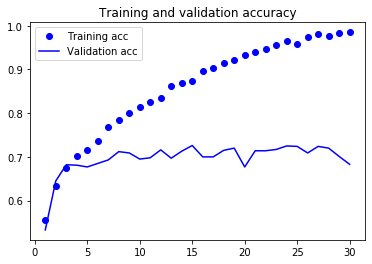

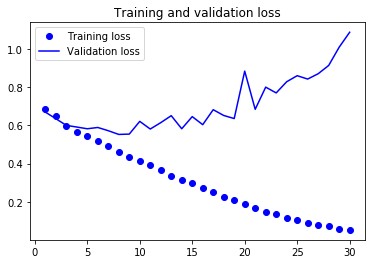

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 数据增强
利用ImageDataGenerator来设置数据增强

In [15]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

* rotation_range 角度址（0-180范围内），图像随机旋转的角度范围
* width_shift_range、height_shift_range 水平方向、垂直方向上平移的范围（相对于总宽度和总高度的比例）
* shear_range 随机错切变换的角度
* zoom_range 图像随机缩放的范围
* horizontal_flip 随机将一半图像水平翻转
* fill_mode 填充新创建像素的方法，这些新像素可能来自于旋转或宽度／高度平移

img shape
x shape (150, 150, 3)
x reshape shape (1, 150, 150, 3)


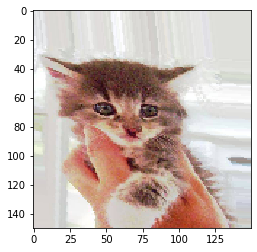

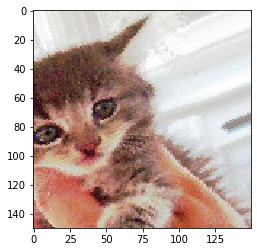

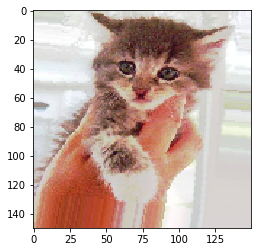

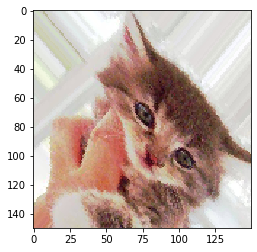

In [17]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
print('img shape')
x = image.img_to_array(img)
print('x shape', x.shape)
x = x.reshape((1,) + x.shape)
print('x reshape shape', x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### 为降低过拟合，考虑在网络层中加dropout
dropout是个啥，不晓得

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [24]:
train_datagen  = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)  # 验证数据不增强

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 126s - loss: 0.7051 - acc: 0.5219 - val_loss: 0.6929 - val_acc: 0.5451
Epoch 2/100
100/100 [==============================] - 131s - loss: 0.6676 - acc: 0.5775 - val_loss: 0.6435 - val_acc: 0.5896
Epoch 3/100
100/100 [==============================] - 130s - loss: 0.6332 - acc: 0.6366 - val_loss: 0.6071 - val_acc: 0.6501
Epoch 4/100
100/100 [==============================] - 173s - loss: 0.6262 - acc: 0.6503 - val_loss: 0.5941 - val_acc: 0.6740
Epoch 5/100
100/100 [==============================] - 199s - loss: 0.6084 - acc: 0.6584 - val_loss: 0.5840 - val_acc: 0.6920
Epoch 6/100
100/100 [==============================] - 176s - loss: 0.5923 - acc: 0.6847 - val_loss: 0.5848 - val_acc: 0.6656
Epoch 7/100
100/100 [==============================] - 159s - loss: 0.5929 - acc: 0.6834 - val_loss: 0.5589 - val_acc: 0.7024
Epoch 8/100
100/100 [=============

100/100 [==============================] - 109s - loss: 0.4229 - acc: 0.8084 - val_loss: 0.4214 - val_acc: 0.8106
Epoch 65/100
100/100 [==============================] - 108s - loss: 0.4180 - acc: 0.8006 - val_loss: 0.4354 - val_acc: 0.7970
Epoch 66/100
100/100 [==============================] - 109s - loss: 0.4026 - acc: 0.8119 - val_loss: 0.4657 - val_acc: 0.7887
Epoch 67/100
100/100 [==============================] - 109s - loss: 0.4162 - acc: 0.8106 - val_loss: 0.4528 - val_acc: 0.7880
Epoch 68/100
100/100 [==============================] - 108s - loss: 0.4184 - acc: 0.8028 - val_loss: 0.4392 - val_acc: 0.8008
Epoch 69/100
100/100 [==============================] - 109s - loss: 0.3919 - acc: 0.8172 - val_loss: 0.4345 - val_acc: 0.8027
Epoch 70/100
100/100 [==============================] - 107s - loss: 0.4147 - acc: 0.8041 - val_loss: 0.4551 - val_acc: 0.8027
Epoch 71/100
100/100 [==============================] - 109s - loss: 0.4018 - acc: 0.8188 - val_loss: 0.4450 - val_acc: 0.80

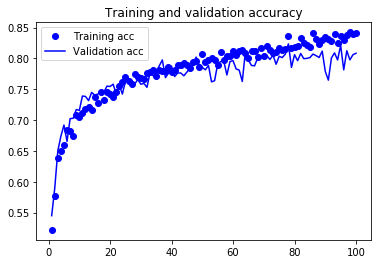

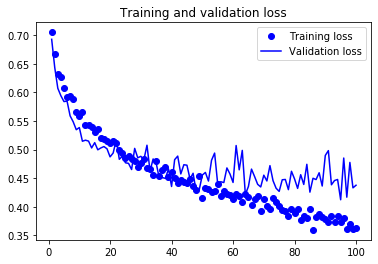

In [25]:
# 再次绘图，查看结果
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()